In [2]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [3]:
train = pd.read_csv('result/ml_train_results.csv', index_col=0)
test = pd.read_csv('result/ml_test_results.csv',  index_col=0)

In [4]:
def plot_confusion_matrix(cm, method, cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    tick_marks = np.arange(3)
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))

    plt.title(method)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    label_names = ['L0', 'L1', 'L2']
    plt.xticks([0,1,2], labels=label_names)
    plt.yticks([0,1,2], labels=label_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

In [5]:
machine_name = ['SVM', 'RF', 'XGB']

cm_svm = confusion_matrix(test.label, test.svm)
cm_rf = confusion_matrix(test.label, test.rf)
cm_xgb= confusion_matrix(test.label, test.xgb)

cms = [cm_svm, cm_rf, cm_xgb]

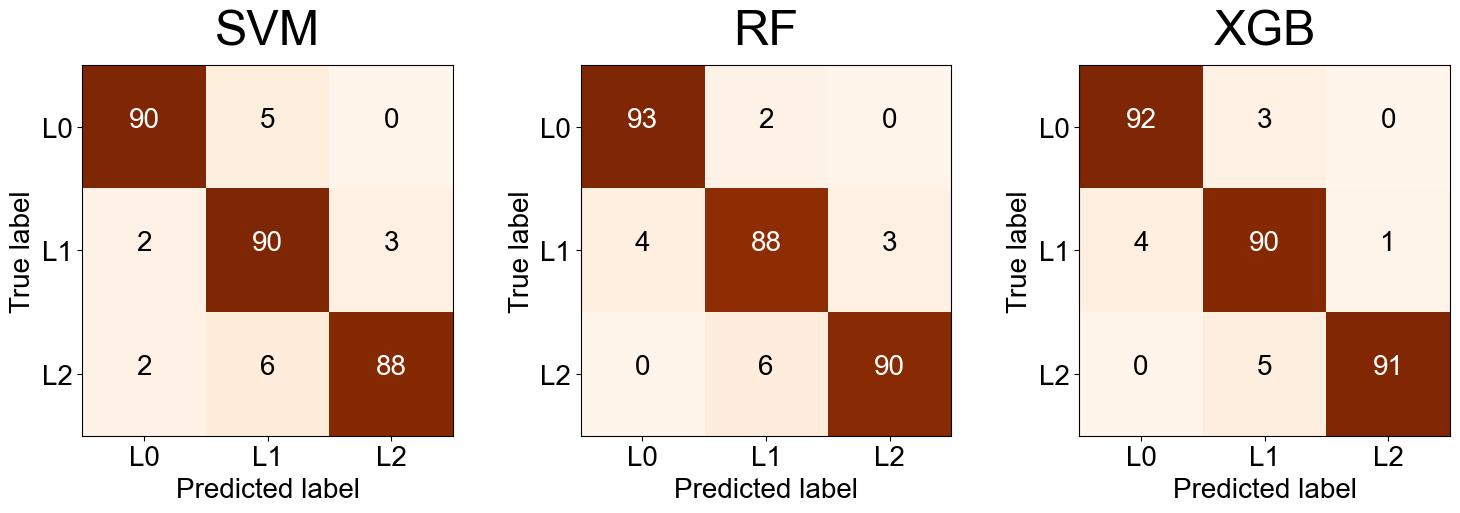

In [10]:
# fig3a
plt.figure(figsize=(15,60))
grid_s = gridspec.GridSpec(1,3)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Arial'

for idx, method in enumerate(machine_name):
    ax = plt.subplot(grid_s[idx])
    plot_confusion_matrix(cms[idx],method)
    plt.title(machine_name[idx], fontsize=35, pad=15)
    title_font = {'fontname':'Arial'}
    plt.tight_layout(w_pad=2)
    

In [11]:
proba_svm = np.loadtxt('result/svm_proba.csv', delimiter=',')
proba_rf = np.loadtxt('result/rf_proba.csv', delimiter=',')
proba_xgb = np.loadtxt('result/xgb_proba.csv', delimiter=',')
probas = [proba_svm, proba_rf, proba_xgb]

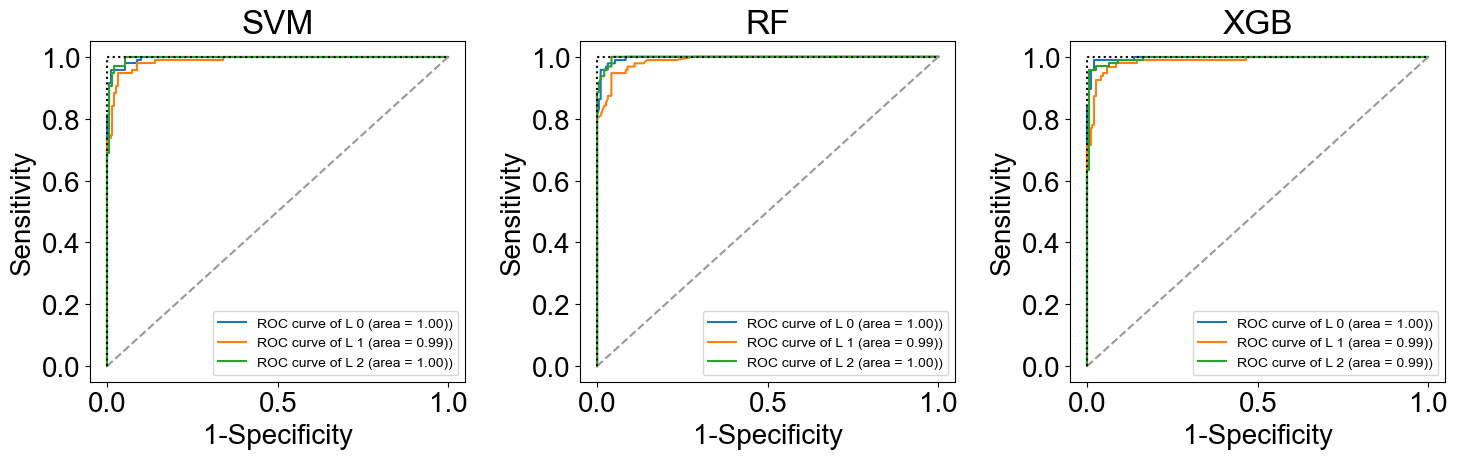

In [12]:
# fig3b

plt.rc('legend', fontsize=10)  

plt.figure(figsize=(15,5))
grid_s = gridspec.GridSpec(1,3)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, method in enumerate(machine_name):
    ax = plt.subplot(grid_s[idx])

    for i in range(3):
        proba = probas[idx][:,i]
        fpr, tpr, _ = roc_curve(test.label, proba, pos_label=i)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label='ROC curve of L {0:0d} (area = {1:0.2f}))'.format(i,roc_auc))

    plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6))
    plt.plot([0,0,1],[0,1,1], linestyle=':', color='black')
    plt.legend(loc='lower right')
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title(method)

plt.tight_layout()
plt.show()